# Análisis exploratorio


In [25]:
# Importacion de paquetes necesarios
import pandas as pd
from pandas.core.common import flatten
import json
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
import datetime
from sklearn.preprocessing import MinMaxScaler

from numpy import logical_or
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Dataset 21 de Julio Categorias Pre -Hotale
with open("data_analisis/categorias.json") as file:
    categorias  = json.load(file)
categorias = pd.DataFrame(categorias)

# Dataset 27 de Julio Categorias Pre -Hotale
with open("data_analisis_HS/categorias.json") as file:
    categoriashs  = json.load(file)
categoriashs = pd.DataFrame(categoriashs)


### El número de  publicaciones con descuento solo representa el 0.5% de las publicaciones totales para el día 21 de Julio.

In [26]:
categoriashs

,id,name,total_discount,total,total_nodiscount
0,MLA5725,Accesorios para Vehículos,194678,8103580,7908904
1,MLA1512,Agro,2610,54318,51709
2,MLA1403,Alimentos y Bebidas,4272,187652,183382
3,MLA1071,Animales y Mascotas,635,149797,149163
4,MLA1367,Antigüedades y Colecciones,403,511419,511016
5,MLA1368,"Arte, Librería y Mercería",3449,378195,374746
6,MLA1743,"Autos, Motos y Otros",0,185225,185225
7,MLA1384,Bebés,10685,299015,288322
8,MLA1246,Belleza y Cuidado Personal,29400,427362,397965
9,MLA1039,Cámaras y Accesorios,1525,167515,165990


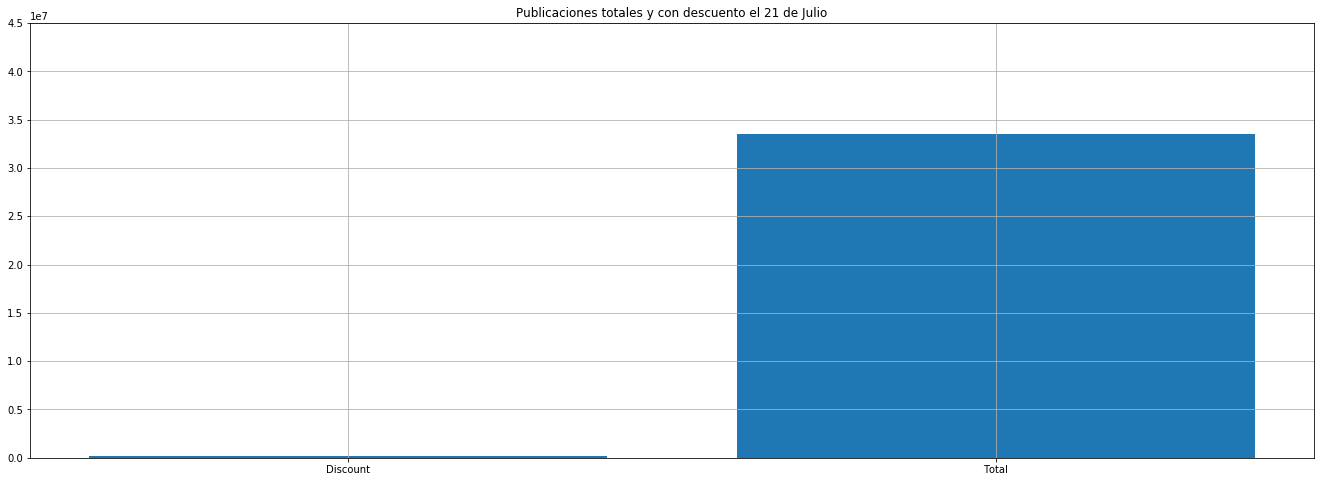

In [2]:
fig = plt.figure(figsize=(23,8)) # Create matplotlib figure
xs = [categorias["total_discount"].sum(), categorias["total"].sum()]
ys = ["Discount", "Total"]
plt.bar( ys,xs)
plt.title("Publicaciones totales y con descuento el 21 de Julio")
plt.yticks(range(0,50000000,5000000));
plt.grid()

### Aprovechando el HOTSALE vamos a comparar en grandes rasgos como varian el número y proporción de publicaciones con descuento. Utilizaremos una vista de la base de datos durante el Hostsale el 27 de Julio y mergeamos con los datos del 21 de Julio para comparar.

In [3]:
# Join de ambos dataframes de categorias.
categoriasm= pd.merge(categorias,categoriashs, on="id", suffixes=("","_hotsale") ).drop(["name_hotsale"],axis=1)
categoriasm

,id,name,total_discount,total,total_nodiscount,total_discount_hotsale,total_hotsale,total_nodiscount_hotsale
0,MLA5725,Accesorios para Vehículos,31034,7937808,7906774,194678,8103580,7908904
1,MLA1512,Agro,872,54257,53382,2610,54318,51709
2,MLA1403,Alimentos y Bebidas,1855,185827,183979,4272,187652,183382
3,MLA1071,Animales y Mascotas,271,149357,149091,635,149797,149163
4,MLA1367,Antigüedades y Colecciones,129,509574,509473,403,511419,511016
5,MLA1368,"Arte, Librería y Mercería",648,377963,376431,3449,378195,374746
6,MLA1743,"Autos, Motos y Otros",0,184940,184929,0,185225,185225
7,MLA1384,Bebés,7659,297511,289849,10685,299015,288322
8,MLA1246,Belleza y Cuidado Personal,15205,427311,412066,29400,427362,397965
9,MLA1039,Cámaras y Accesorios,585,166774,166190,1525,167515,165990


### En primera instancia vemos que las categorias de Eventos, Inmuebles, Serivicios y Autos/Motos tienen 0 publicaciones con descuento en ambos datasets por lo que se las descarta. Es probable que sea porque son categorias de transacciones de bienes no materiales o bienes muy caros. Usaremos solamente las 27 categorias restantes.

In [4]:
# Eleminación de publicaciones con menos de 1 publicacion con descuento
categoriasm = categoriasm[categoriasm["total_discount"]>1].reset_index(drop = True)
#Creación de variables para el analisis
categoriasm["ratio_discount"] = 100*categoriasm["total_discount"]/categoriasm["total"]
categoriasm["ratio_discount_hotsale"] = 100*categoriasm["total_discount_hotsale"]/categoriasm["total_hotsale"]
categoriasm["ratio_comparacion"]= categoriasm["ratio_discount_hotsale"]/ categoriasm["ratio_discount"]
categoriasm["dif_comparacion"] =  categoriasm["ratio_discount_hotsale"] - categoriasm["ratio_discount"] 

#### Graficamos el número de descuentos y proporción de publicaciones para cada categoria antes del Hotsale
- Belleza y cuidado es la categoria con mayor proporción de sus publicacion con descuento: 3.56%
- Agro aunque tiene pocas publicaciones con descuento: 900, representa una alta proporción de sus publicaciones 1,6%
- En opocision Accesorios para vehículos tiene muchas publicaciones de descuentos, más de 30000, pero representa un numero muy bajo respecto a su total de publciaciones.


''

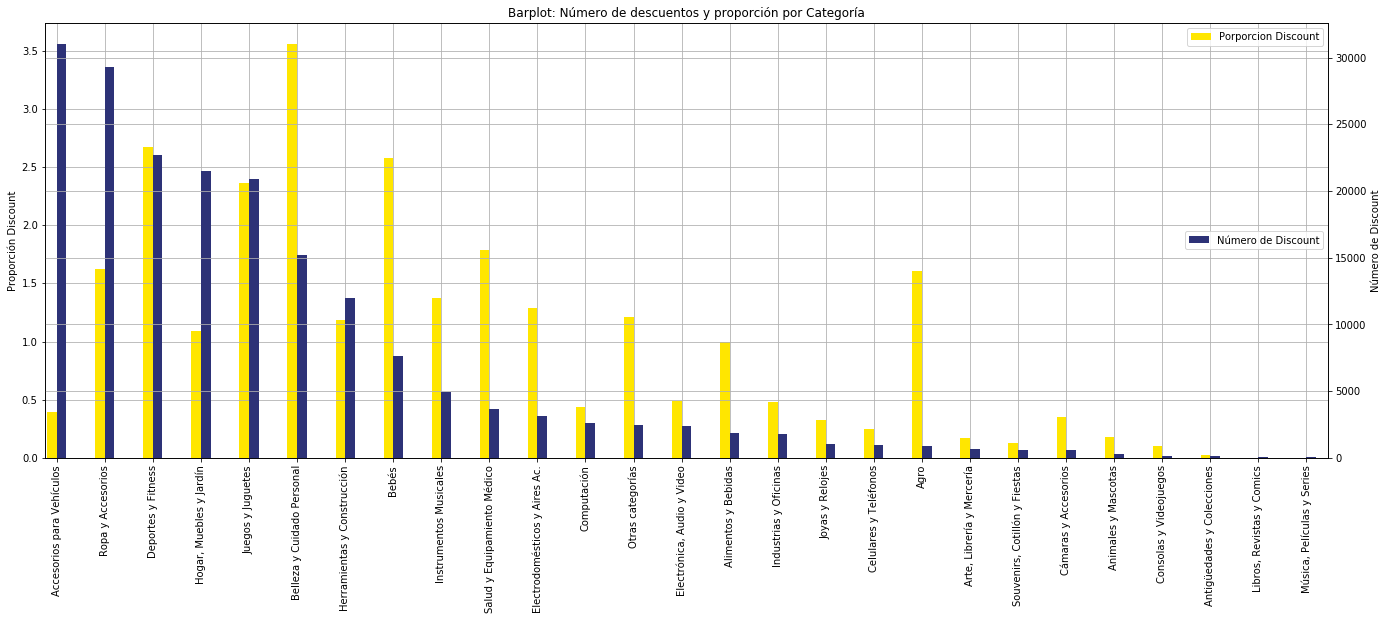

In [5]:
categoriasm = categoriasm.sort_values("total_discount", ascending = False)
fig = plt.figure(figsize=(23,8)) 
ax = fig.add_subplot(111) 
ax2 = ax.twinx() 
width=0.2   
categoriasm.ratio_discount.plot(kind='bar', color='#ffe600', ax=ax, width=width, position=1,x=categoriasm.id, label="Porporcion Discount")
categoriasm.total_discount.plot(kind='bar', color='#2d3277', ax=ax2, width=width, position=0,x=categoriasm.id, label="Número de Discount")
ax.set_ylabel('Proporción Discount')
ax2.set_ylabel('Número de Discount')
plt.xticks(rotation=0)
plt.xticks(range(len(categoriasm)), categoriasm["name"],rotation=20)
ax.legend(loc=1)
ax2.legend(loc=5)
plt.title("Barplot: Número de descuentos y proporción por Categoría")
ax.grid()
ax2.grid()
;

#### Vemos que en general todas las categorias aumentaron la proporción de publicaciones con Descuento desdel Hotsale:

- Cuidado personal, Agro y Fitness aumentaron 3% en la cantidad de publicacion con respecto al total de su categoria.
- El aumento en su proporción de descuentos esta levemente correlacionado con el proporción original.

''

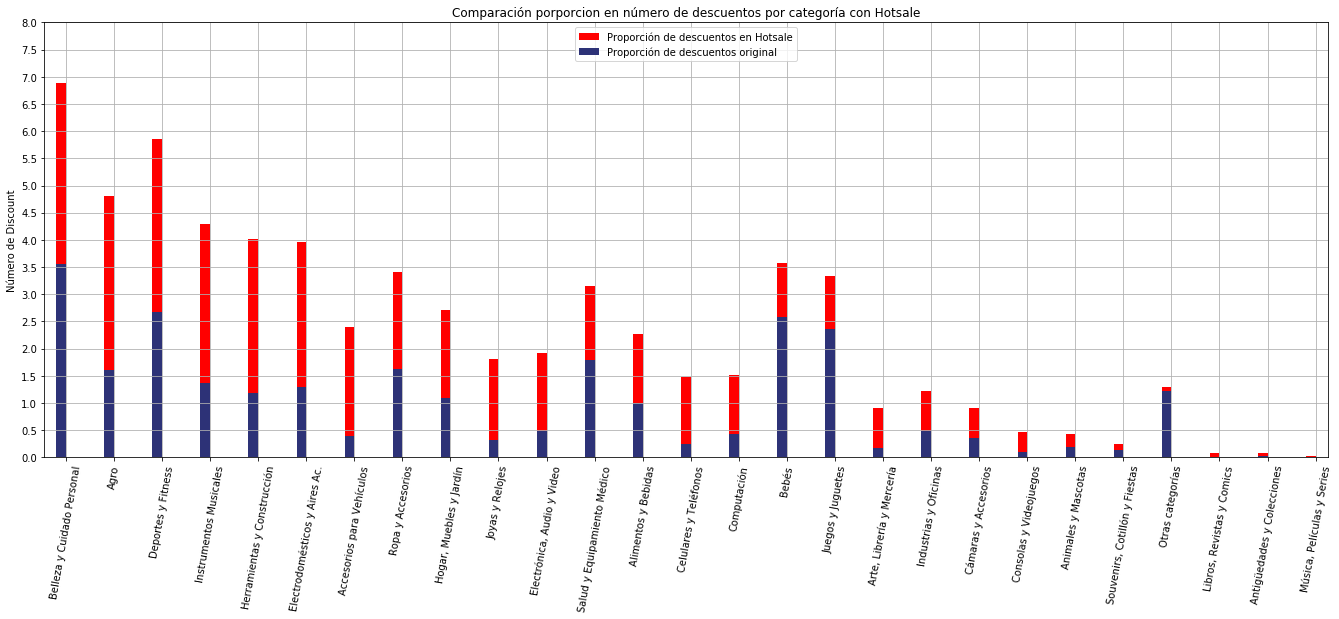

In [6]:
fig = plt.figure(figsize=(23,8)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
categoriasm = categoriasm.sort_values("dif_comparacion", ascending = False)
categoriasm.ratio_discount_hotsale.plot(kind='bar', color='r', ax=ax, width=width, position=1,x=categoriasm.id, label="Proporción de descuentos en Hotsale",alpha=1)
categoriasm.ratio_discount.plot(kind='bar', color='#2d3277', ax=ax, width=width, position=1,x=categoriasm.id, label="Proporción de descuentos original",alpha=1)
# ax.set_xlabel(categoriasm.id)

ax.set_ylabel('Número de Discount')
plt.yticks(np.arange(0,8.1,0.5))
plt.xticks(range(len(categoriasm)), categoriasm["name"],rotation=80)
ax.legend(loc=9)
plt.title("Comparación porporcion en número de descuentos por categoría con Hotsale")
ax.grid()
;

### Efectivamente comprobamos que hay una relación lineal entre la proporción de descuentos de cada categoria antes y despues de Hotsale

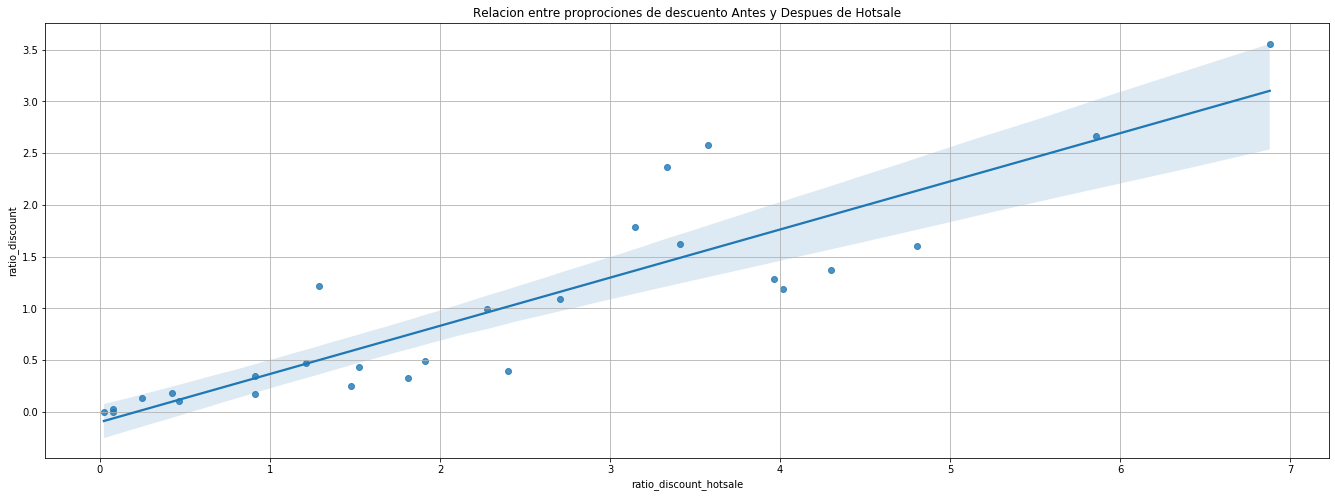

In [7]:
fig = plt.figure(figsize=(23,8)) # Create matplotlib figure
sns.regplot(data =categoriasm, x="ratio_discount_hotsale", y ="ratio_discount" )
ax.set_ylabel('Proporción en Hotsale')
ax.set_ylabel('Proporción antes de Hotsale')
ax.legend(loc=9)
plt.title("Relacion entre proprociones de descuento Antes y Despues de Hotsale")
plt.grid()

In [8]:
categoriasm = categoriasm.sort_values("ratio_discount",ascending =False).rename_axis('before_ranking').reset_index()

categoriasm["before_hotsale"] = categoriasm["before_ranking"] +1

categoriasm = categoriasm.sort_values("ratio_discount_hotsale",ascending =False).rename_axis('after_ranking').reset_index()
categoriasm["after_hotsale"] = categoriasm["after_ranking"]+1

#### Si rankeamos por proporción de publicaciones antes y despues del hotsale vemos:

- *Cuidado Personal* paso de la 8ta posicion a la 1era
- Accesorios para Vehículos, Agro, ailmentos, Mascotas y categorias de electronica descienden varias posicones desde el frente.
- Ropas, accesorios, Bebes y Juguetes suben varias posiciones al frente.
- Salud y equipamiento Medico sube de la posicion 25ta a 5ta, por la situacion del pandemia.

Text(0, 0.5, 'Categorias')

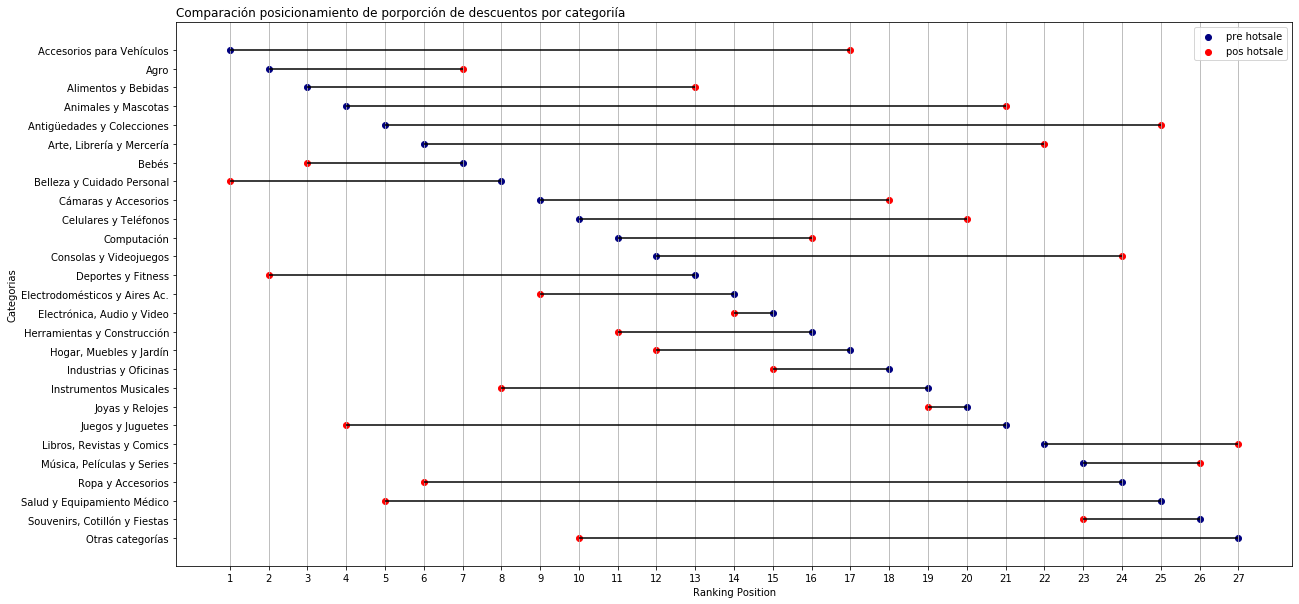

In [9]:
fig, axes = plt.subplots( figsize=(20, 10))
ordered_df = categoriasm.sort_values("before_hotsale",ascending =False)
my_range=range(1,len(categoriasm)+1)
plt.hlines(y=my_range, xmin=ordered_df['before_hotsale'], xmax=ordered_df['after_hotsale'], color='black', alpha=1)
plt.scatter(ordered_df['before_hotsale'], my_range, color='navy', alpha=1, label='pre hotsale')
plt.scatter(ordered_df['after_hotsale'], my_range, color='r', alpha=1 , label='pos hotsale')
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['name'])
plt.xticks(my_range)
plt.grid(axis='x', which='major')
plt.title("Comparación posicionamiento de porporción de descuentos por categoriía", loc='left')
plt.xlabel('Ranking Position')
plt.ylabel('Categorias')

#### Si comparamos números totales antes y despues del hotsale vemos que la cantidad totales no varia significativamente. Por lo que la mayoría de las publicaciones nuevas con descuentos de Hotsale son de publicaciones ya existentes.

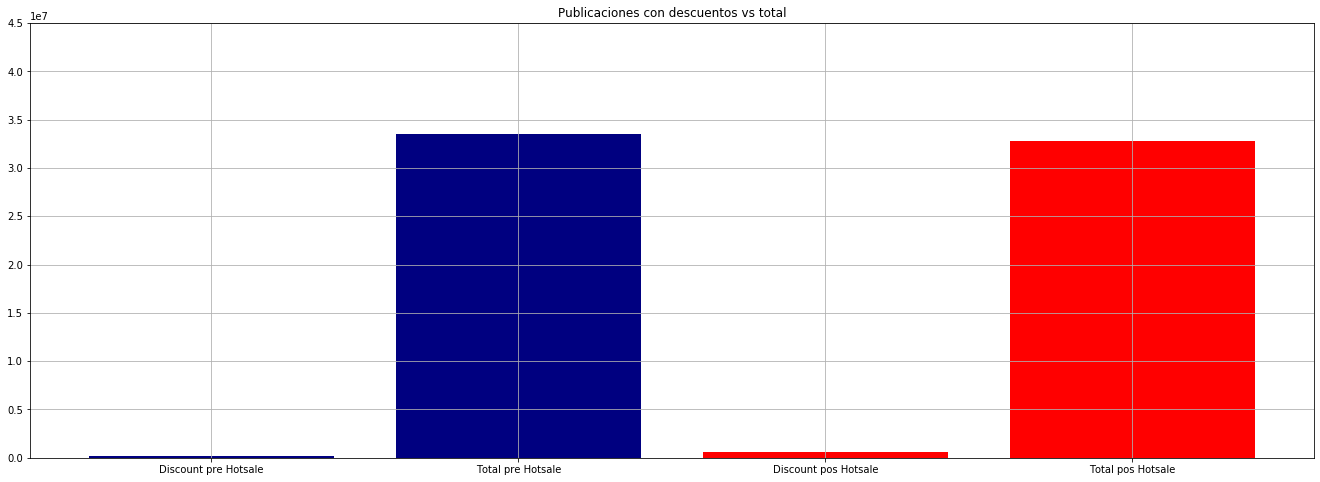

In [10]:
fig = plt.figure(figsize=(23,8)) # Create matplotlib figure
xs = [categorias["total_discount"].sum(), categorias["total"].sum(), categoriasm["total_discount_hotsale"].sum(), categoriasm["total_hotsale"].sum()]
ys = ["Discount pre Hotsale", "Total pre Hotsale","Discount pos Hotsale","Total pos Hotsale"]
plt.bar( ys,xs,color=["navy","navy",'r','r'])
plt.title("Publicaciones con descuentos vs total")
plt.yticks(range(0,50000000,5000000));
plt.grid()



## Continuaremos analizando únicamente las caracteristicas pre-Hotsale de datos del 21 de Julio dado que son más representantivas a cualquier estado del año

## Debido a que el Json pesa 1 GB aproximadamente llamamos directamente el CSV generado en "Generation_discount.ipynb"

In [11]:
df = pd.read_csv("data_analisis/discount.csv",index_col=0 )

C:\Users\rodri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154275 entries, 0 to 154299
Data columns (total 75 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   id                                                      154275 non-null  object 
 1   title                                                   154275 non-null  object 
 2   price                                                   154275 non-null  float64
 3   currency_id                                             154275 non-null  object 
 4   available_quantity                                      154275 non-null  int64  
 5   sold_quantity                                           154275 non-null  int64  
 6   buying_mode                                             154275 non-null  object 
 7   listing_type_id                                         154275 non-null  object 
 8   stop_time               

### Vemos que hay muchas columnas con elementos faltantes y procedemos a eliminar columnas con más del 45% faltante.

Text(0.5, 1, 'Datos faltantes antes de la limpieza')

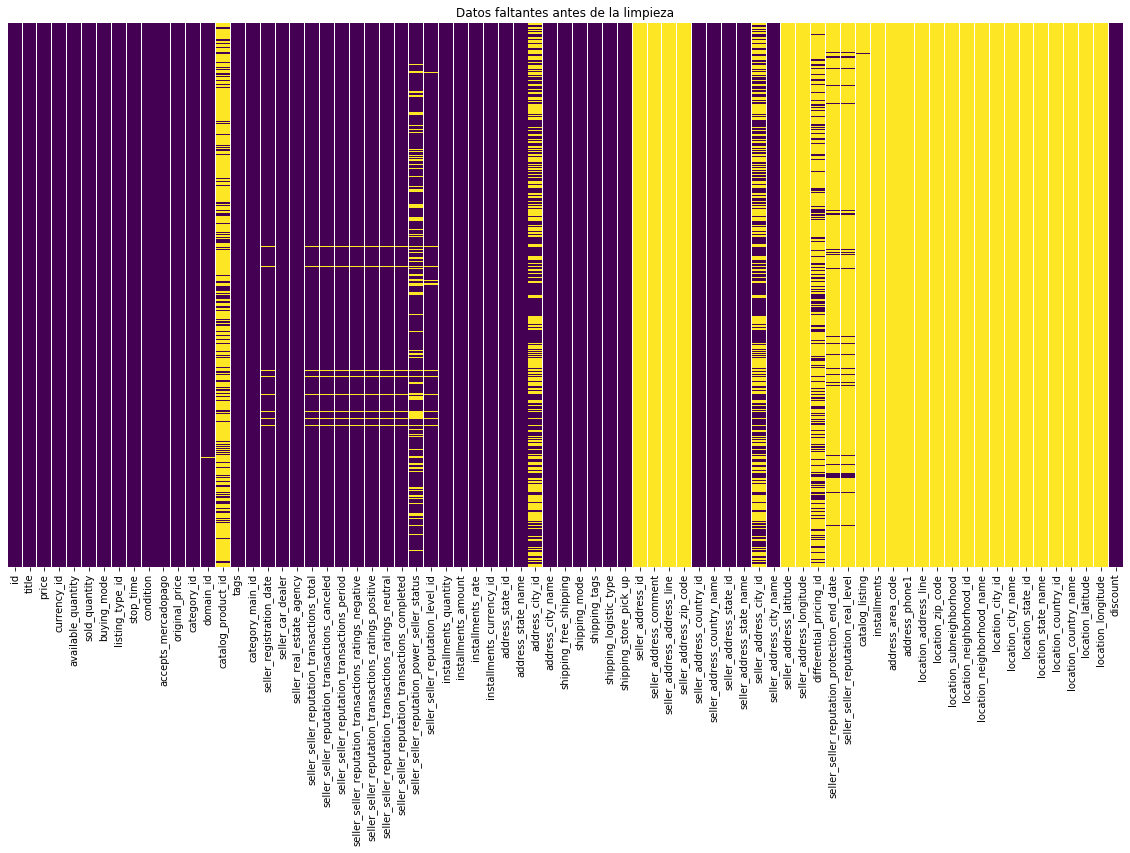

In [13]:
fig, axes = plt.subplots( figsize=(20, 10))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
axes.set_title("Datos faltantes antes de la limpieza")


In [14]:
# Elimino columnas con valores faltantes mayor al 45%
missing_prop =(df.isnull().sum() / df.shape[0] * 100.00)
print("Columnas Eliminadas:")
print(missing_prop[(missing_prop>45)])
df = df.drop(missing_prop[(missing_prop>45)].index,axis=1)

Columnas Eliminadas:
catalog_product_id                               80.146492
address_city_id                                  50.612218
seller_address_id                               100.000000
seller_address_comment                          100.000000
seller_address_address_line                     100.000000
seller_address_zip_code                         100.000000
seller_address_city_id                           50.612218
seller_address_latitude                         100.000000
seller_address_longitude                        100.000000
differential_pricing_id                          73.697618
seller_seller_reputation_protection_end_date     94.888349
seller_seller_reputation_real_level              94.888349
catalog_listing                                  99.932588
installments                                    100.000000
address_area_code                               100.000000
address_phone1                                  100.000000
location_address_line              

#### Datos faltantes despues de la limpieza

Text(0.5, 1, 'Datos faltantes despues de la limpieza')

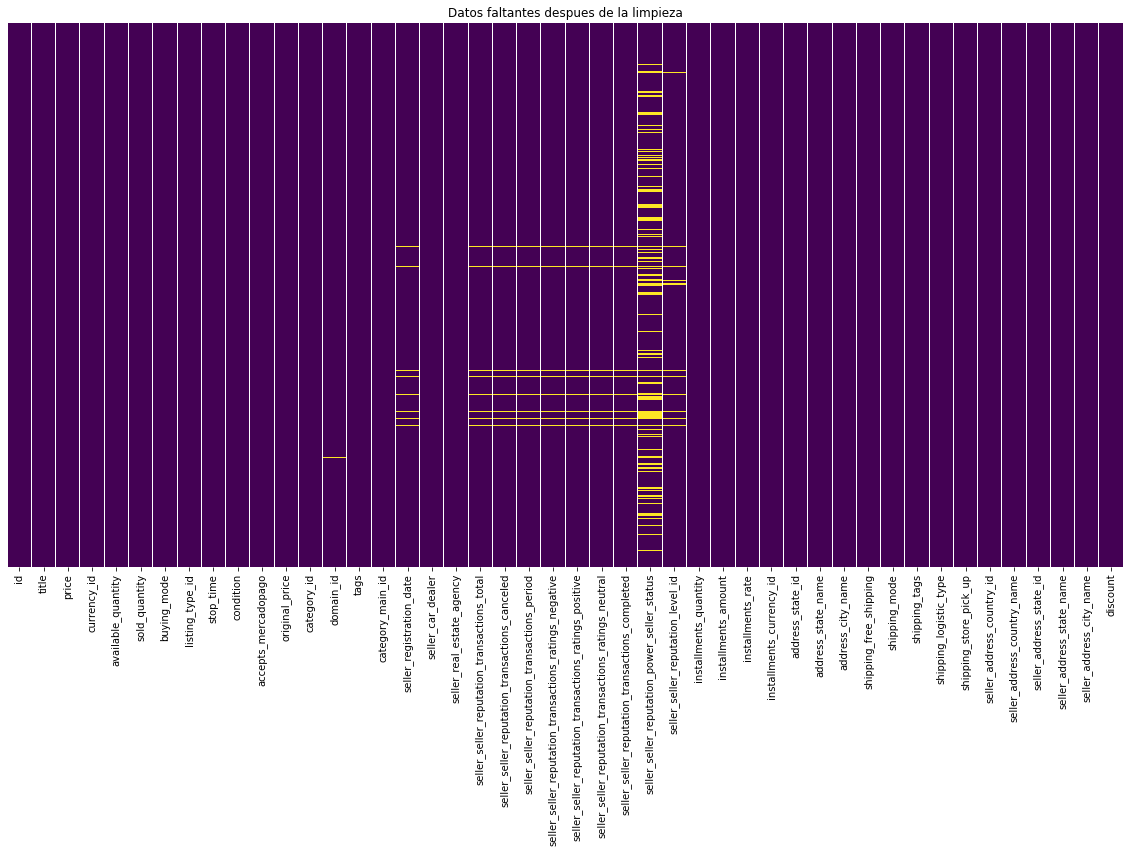

In [15]:
fig, axes = plt.subplots( figsize=(20, 10))
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
axes.set_title("Datos faltantes despues de la limpieza")


### Imputo los valors faltante ####
 
- Fecha de registro se imputa con la fecha de hoy
- Número de transacciones y calificaciones positiva y negativa con 0
- Calificacion neutra en 1
- Columnas categoricas con un nuevo valor


In [16]:
df["domain_id"].fillna("ML-NA",inplace = True)
df["seller_registration_date"].fillna(datetime.datetime.today(),inplace = True)
df["seller_seller_reputation_transactions_total"].fillna(0,inplace = True)
df["seller_seller_reputation_transactions_canceled"].fillna(0,inplace = True)
df["seller_seller_reputation_transactions_ratings_negative"].fillna(0,inplace = True)
df["seller_seller_reputation_transactions_ratings_positive"].fillna(0,inplace = True)
df["seller_seller_reputation_transactions_ratings_neutral"].fillna(1,inplace = True)
df["seller_seller_reputation_transactions_completed"].fillna(0,inplace = True)
df["shipping_logistic_type"].fillna("custom",inplace = True)
df["seller_seller_reputation_power_seller_status"].fillna("without",inplace = True)
df["seller_seller_reputation_level_id"].fillna("0_blank",inplace = True)
df["installments_quantity"].fillna(0,inplace = True)
df["installments_amount"].fillna(0,inplace = True)
df["installments_rate"].fillna(0,inplace = True)

#### Expando datos anidados en Listas en Tags y Shipping tags. De esta forma creo nuevas variables booleans si tienen el tag y creo una nueva variable para cada tag que contenga la cantidad de tags originales en cada registro. Si el tag esta presente o ausente más del 90% de los registros lo descarto.

In [17]:
def explode_tag(dframe , column_tag, threshold = 0.1):
    tags = list(flatten(dframe[column_tag].values))
    tags_filter = {x:tags.count(x) for x in set(tags) if 1-threshold >(tags.count(x)/len(dframe))>threshold}
    for shiptag in tags_filter:
        dframe[shiptag] = False
        dframe.loc[dframe[column_tag].apply(lambda x: shiptag in x), shiptag] = True
    dframe[f"{column_tag}_len"] = dframe[column_tag].apply(len)
    return dframe
explode_tag(df,"tags")
explode_tag(df,"shipping_tags")
df = df.drop(["shipping_tags","tags"],axis = 1,errors = "ignore")

#### Reemplazo valores de shipping que podrian repetirse con otras columnas en el momento de encodear valores booleanos y borro variables booleanas con datos constantes superiores al 90%

In [18]:
df.loc[df["shipping_mode"]=='custom', "shipping_mode" ] = "shipping_custom"
df.loc[df["shipping_mode"]=='not_specified', "shipping_mode" ] = "shipping_not_specified"
df_bool=df.select_dtypes(["bool"]).mean()
print("Columnas eliminadas:")
print(["accepts_mercadopago","seller_car_dealer","seller_real_estate_agency","shipping_store_pick_up","seller_address_state_id","address_state_id","seller_address_state_name"])
df = df.drop(["accepts_mercadopago","seller_car_dealer","seller_real_estate_agency","shipping_store_pick_up","seller_address_state_id","address_state_id","seller_address_state_name"],axis=1,errors = "ignore")

Columnas eliminadas:
['accepts_mercadopago', 'seller_car_dealer', 'seller_real_estate_agency', 'shipping_store_pick_up', 'seller_address_state_id', 'address_state_id', 'seller_address_state_name']


#### Transformo las 2 columnas de fechas a la diferencia de días con respecto al día de hoy

In [19]:
df["stop_time"]=pd.to_datetime(df["stop_time"]).dt.tz_localize(None)
df["days_stop"] = df["stop_time"]- datetime.datetime.today()
df["days_stop"] = df["days_stop"].apply(lambda x : x.days)

df["seller_registration_date"]=pd.to_datetime(df["seller_registration_date"]).dt.tz_localize(None)
df["regis_days"] =  datetime.datetime.today() - df["seller_registration_date"]
df["regis_days"] = df["regis_days"].apply(lambda x : x.days)


df.drop(["stop_time","seller_registration_date"], axis= 1 ,inplace =True, errors='ignore')

#### Transformo el título como la longitud de su texto, removiendo Stopwords

In [20]:
from nltk.corpus import stopwords
stopwords_es =  stopwords.words('spanish')
def title2word( title):
    return len(([x for x in title.strip().lower().split(" ") if x not in stopwords_es]))
df["title_words"] = df["title"].apply(title2word)


#### Elimino columnas String con hasta un 90% de datos congelados o columnas que tienen demasiada variación.

In [21]:
dt_object= df.select_dtypes("object")
object_repetition = dt_object.apply(lambda x: x.value_counts()[0]/len(df))
df = df.drop(object_repetition[(object_repetition>0.90)].index,axis=1)
df = df.drop(object_repetition[(object_repetition<0.10)].index,axis=1)

#### Renombro columnas y traigo el significado de las categorias del dataset Categorias

In [22]:
df.rename(columns={'listing_type_id':'listing_type',
                        'shipping_store_pick_up':'store_pick_up',
                         'shipping_logistic_type':'logistic_type',
                         'shipping_free_shipping':'free_shipping',
                         'seller_seller_reputation_level_id':'seller_level_id',
                         'seller_seller_reputation_power_seller_status':'seller_status',
                         'seller_seller_reputation_transactions_completed':'seller_completed',
                         'seller_seller_reputation_transactions_ratings_neutral':'seller_neutral',
                         'seller_seller_reputation_transactions_ratings_positive':'seller_positive',
                         'seller_seller_reputation_transactions_ratings_negative':'seller_negative',
                         'seller_seller_reputation_transactions_total':'seller_total',
                         'seller_seller_reputation_transactions_canceled':'seller_canceled',
                         'category_main_id':'category_main',
                         'domain_id':'domain',
                         'category_id':'category',
                         'sold_quantity':'sold',                
                         'available_quantity':'available',             
                         'domain_id':'domain'
                        }, inplace=True)
df["category_main"] = df["category_main"].map({x:y for x, y in zip(categoriasm["id"],categoriasm["name"])})

### Una vez que tengo el dataframe de publicaciones limpio continuo con el analisis exploratorio:
Aca vemos que el comportamiento por categoría es muy variado y aún modificando el rango de los bigotes vemos gran cantidad de datos clasificados como outliers, probablemente porque hay una distribución asimétrica en todas las categorías. 

- El descuento minimo de cualquier categoría es 5%
- El descuento anormalmente alto de 87% que podría ser un outlier verdadero provocado por un error en la publicación
- El único descuento medio superior a 25% es el de la categoria Computación.
- Oficinas y peliculas/series tiene una distribución muy concentrada en 15% y 20% respectivamente


''

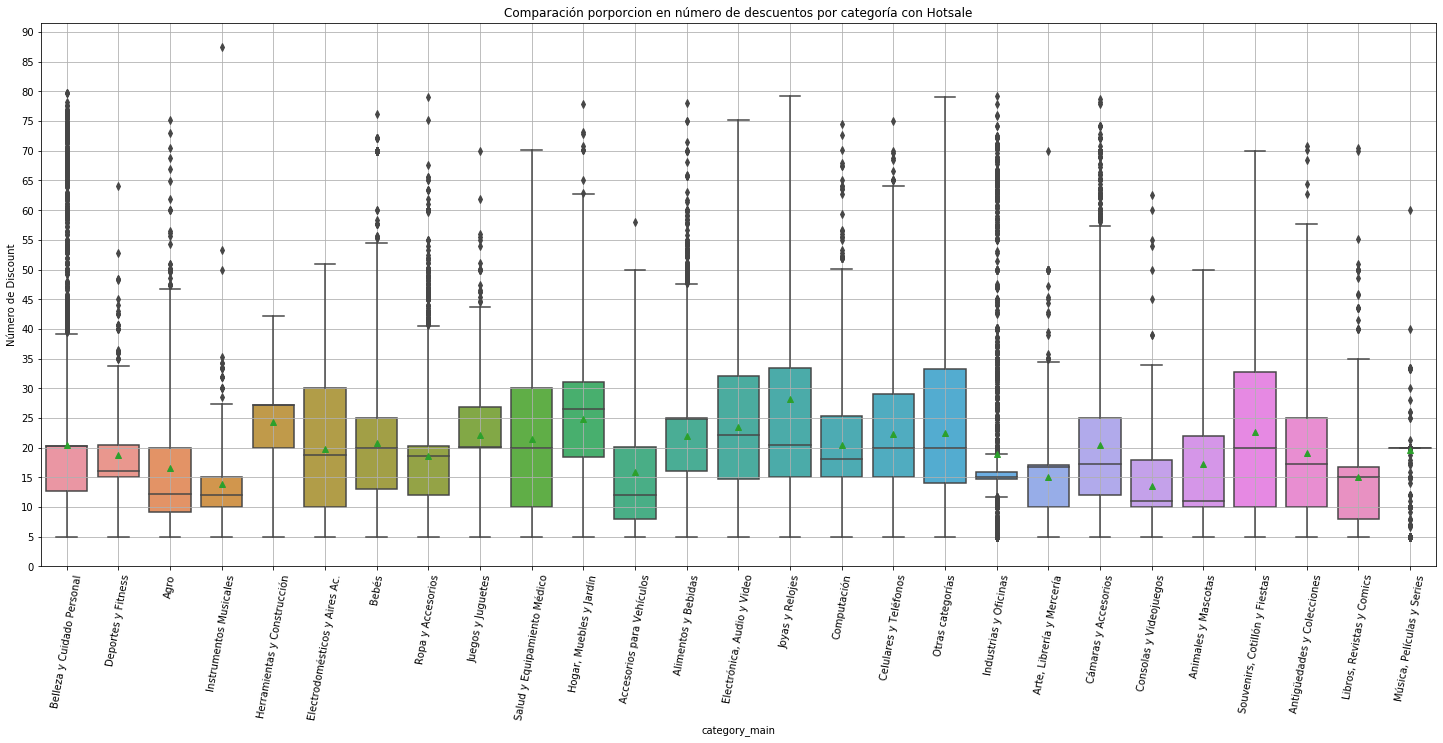

In [23]:
fig , ax = plt.subplots(figsize=(25,10))
sns.boxplot(x="category_main", y="discount",  data=df,ax=ax,showmeans=True,whis=2.5 );

plt.grid()
ax.set_ylabel('Número de Discount')
plt.xticks(range(len(categoriasm)), categoriasm["name"],rotation=80)
plt.yticks(range(0,91,5))
plt.title("Comparación porporcion en número de descuentos por categoría con Hotsale")
;

#### En esta figura vemos 3 gráficos univariados para la variable Discount. 
- La variable posee una distribución asimétrica por derecha con una mediana en 20 y una media en 21. 
- Se ve tambíen que la variable tiene una dispocision a concentrarse en valores multiplos de 5 por lo que su conversion a variable categorica podria ser factible.
- La máxima concentracón de la variable esta en 20%.
- A partir del 40% no se pueden ver otras aglomeraciones.
- el 5% de los datos tienee 5% de descuento


Text(0.5, 0, 'Discount')

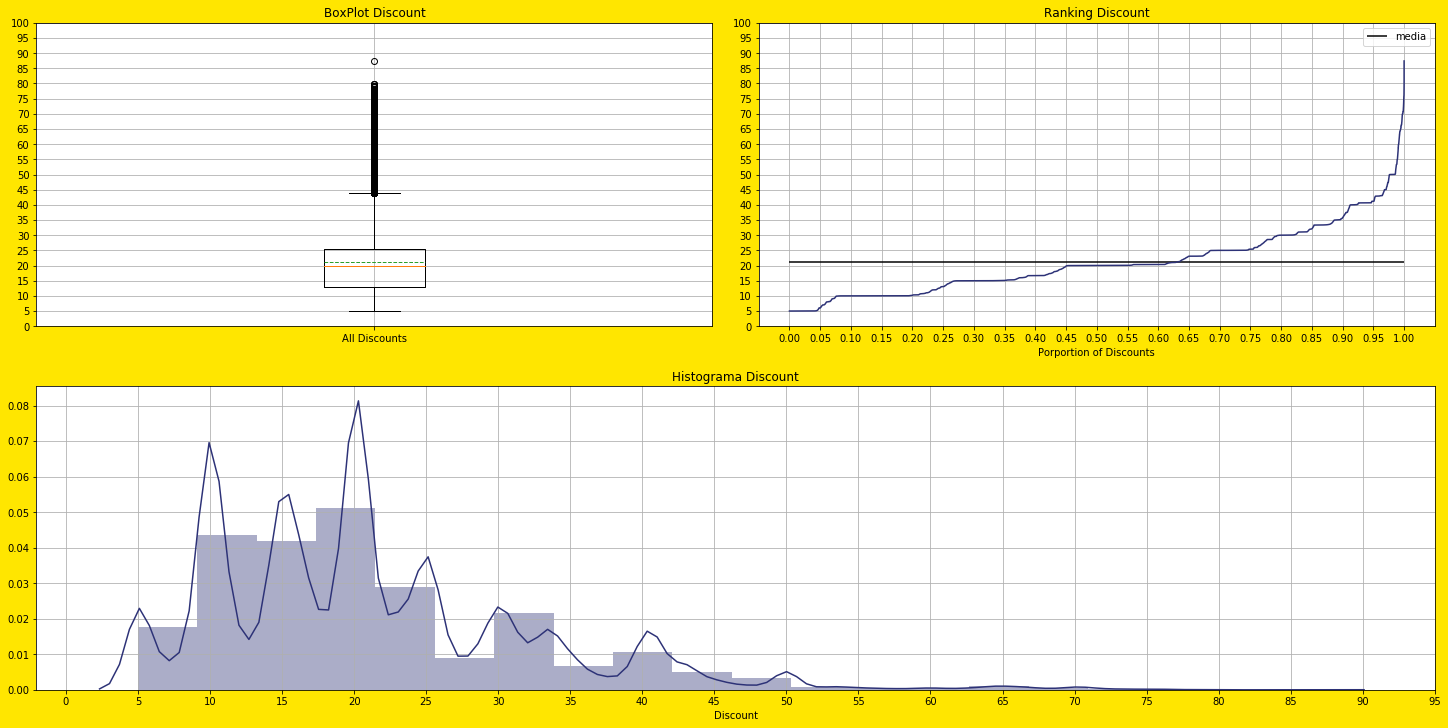

In [26]:
discountorder = df[["discount"]].copy().sort_values("discount").reset_index(drop= True)
discountorder.index= discountorder.index/len(discountorder)
fig3 = plt.figure(constrained_layout=True,figsize=(20,10),facecolor = "#ffe600")
gs = fig3.add_gridspec(2, 2)

f3_ax2 = fig3.add_subplot(gs[0, 0],title="BoxPlot Discount")
plt.grid()
plt.boxplot(df["discount"],meanline=True,labels=["All Discounts"],showmeans=True)
plt.yticks(range(0,101,5))
           
f3_ax3 = fig3.add_subplot(gs[0, 1], title = "Ranking Discount")
plt.plot(discountorder, color = "#2d3277")
plt.hlines(discountorder.mean(), xmin=0,xmax=1, label = "media")
plt.grid()
plt.ylim(10)
plt.yticks(range(0,101,5))
plt.xticks(np.arange(0,1.01,.05))

plt.xlabel("Porportion of Discounts")
plt.legend()
f3_ax1 = fig3.add_subplot(gs[1,:])
sns.distplot(df["discount"], color="#2d3277",bins = 20)

f3_ax1.set_title("Histograma Discount")
plt.grid()
plt.xticks(range(0,100,5))
plt.xlabel("Discount")


#### Analizamos las variables categorias que parecen interesantes:


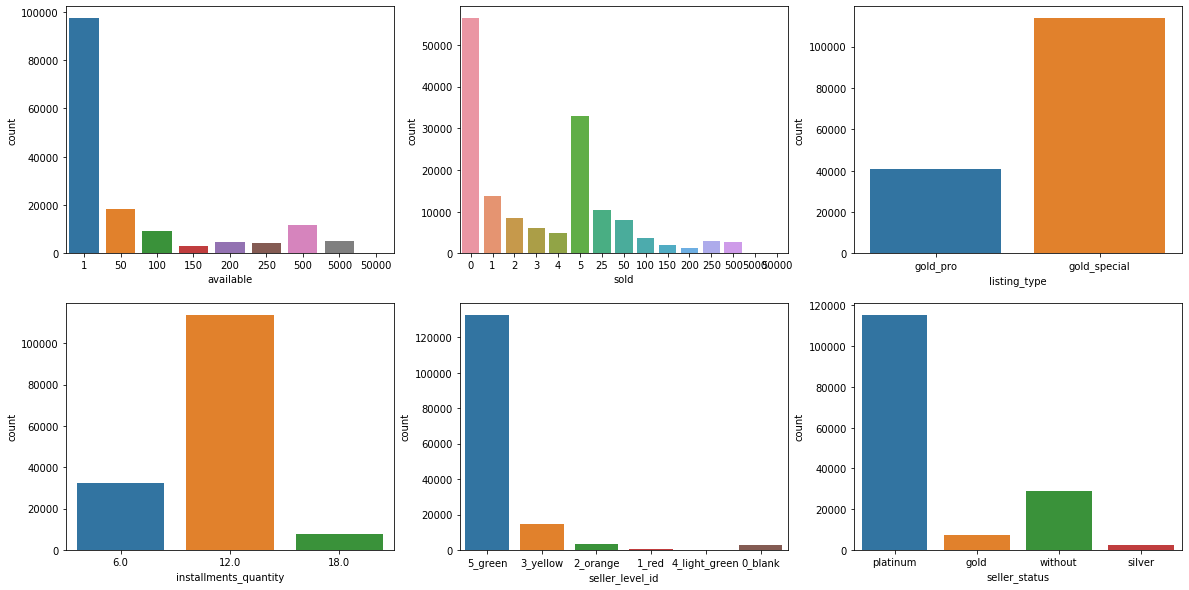

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.countplot('available',data=df,ax=axes[0,0])
sns.countplot('sold',data=df,ax=axes[0,1])
sns.countplot('listing_type',data=df,ax=axes[0,2])
sns.countplot(x="seller_level_id", data=df,ax=axes[1,1])
sns.countplot(x="installments_quantity", data=df,ax=axes[1,0])
sns.countplot(x="seller_status", data=df,ax=axes[1,2])


### En el correlograma es díficil distinguir una asociación lineal de la variable discount con otra variable:
- Se puede resaltar una muy leve asociación con número de ventas del vendedor y número de shipping tags de la publicación.

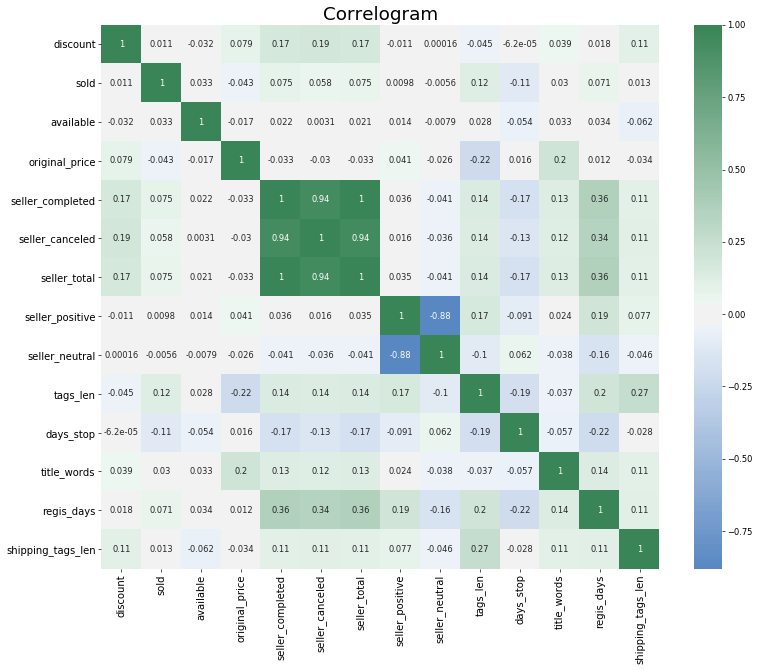

In [28]:
# Plot
plt.figure(figsize=(15,12), dpi= 60)
color = sns.diverging_palette(250, 500, sep=10, as_cmap=True)
heatdf = df[["discount","sold","available","original_price","seller_completed","seller_canceled",
             "seller_total","seller_positive","seller_neutral","tags_len","days_stop","title_words","regis_days"
             ,"shipping_tags_len"]]
sns.heatmap(heatdf.corr(), xticklabels=heatdf.corr().columns, yticklabels=heatdf.corr().columns, cmap=color, center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Gráfico de Logistic_type vs Discount con free_shipping:


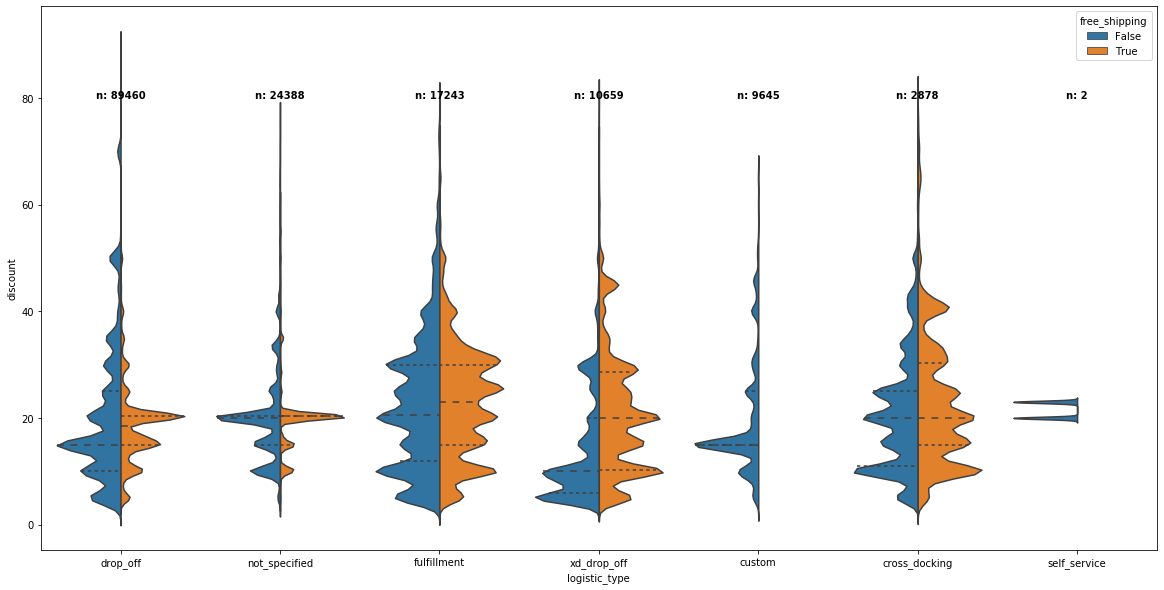

In [29]:
fig , ax = plt.subplots(figsize=(20,10))
sns.violinplot(x="logistic_type", y="discount",  data=df,ax=ax,scale="width",hue="free_shipping",split=True
               , bw=.1, cut=4, inner="quartile");

# Calculate number of obs per group & median to position labels
medians = df.groupby(['logistic_type'])['discount'].median().values
nobs = df['logistic_type'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], 80, nobs[tick], horizontalalignment='center', color='k', weight='semibold')


### Grafico de Seller_status vs Discount con free_shipping:
- Los usuarios con PLatino y free shipping se destacan por descuentos de 40% con respecto a otros valores
- Los usuarios Gold no ofrece mucho free shipping, pero si lo hacen suele ser de 20% descuento
- Los usuarios without presentan una distribución muy similar a la distribución total del descuento, concentrandose en multiplos de 5 y mayoritariamente en 20.

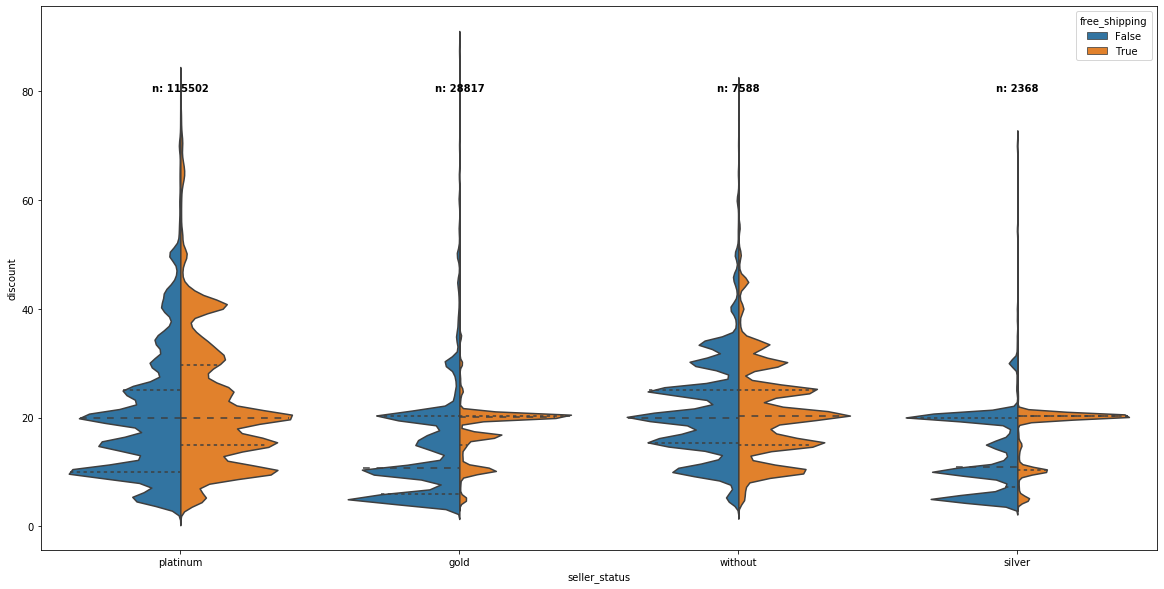

In [30]:
fig , ax = plt.subplots(figsize=(20,10))
sns.violinplot(x="seller_status", y="discount",  data=df,ax=ax,hue="free_shipping",split=True,scale="width"
               , bw=.1, cut=4, inner="quartile");

# Calculate number of obs per group & median to position labels
medians = df.groupby(['seller_status'])['discount'].median().values
nobs = df['seller_status'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], 80, nobs[tick], horizontalalignment='center', color='k', weight='semibold')


### Grafico de available vs Discount:

- available = 1 posee un violin mas ruidoso por la gran cantidad de datos
- available = 100 y 150 tienen cantidad de integrantes similares pero sus formas son distintas, 100 tienen mayor concentración de descuentos en 20%
- caso similar pasa con 200 , 250 y 500, solo 200 presenta concentración de descuentos en 20%.




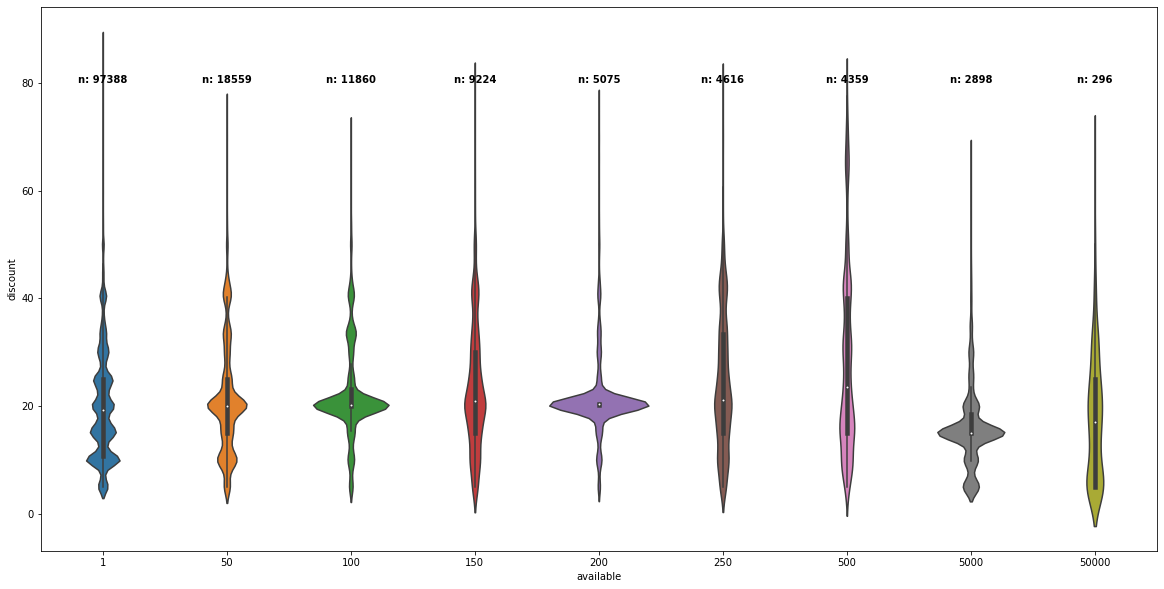

In [31]:
fig , ax = plt.subplots(figsize=(20,10))

sns.violinplot(x="available", y="discount",  data=df)
# Calculate number of obs per group & median to position labels
medians = df.groupby(['available'])['discount'].median().values
nobs = df['available'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], 80, nobs[tick], horizontalalignment='center', color='k', weight='semibold')

### Grafico de sold vs Discount:

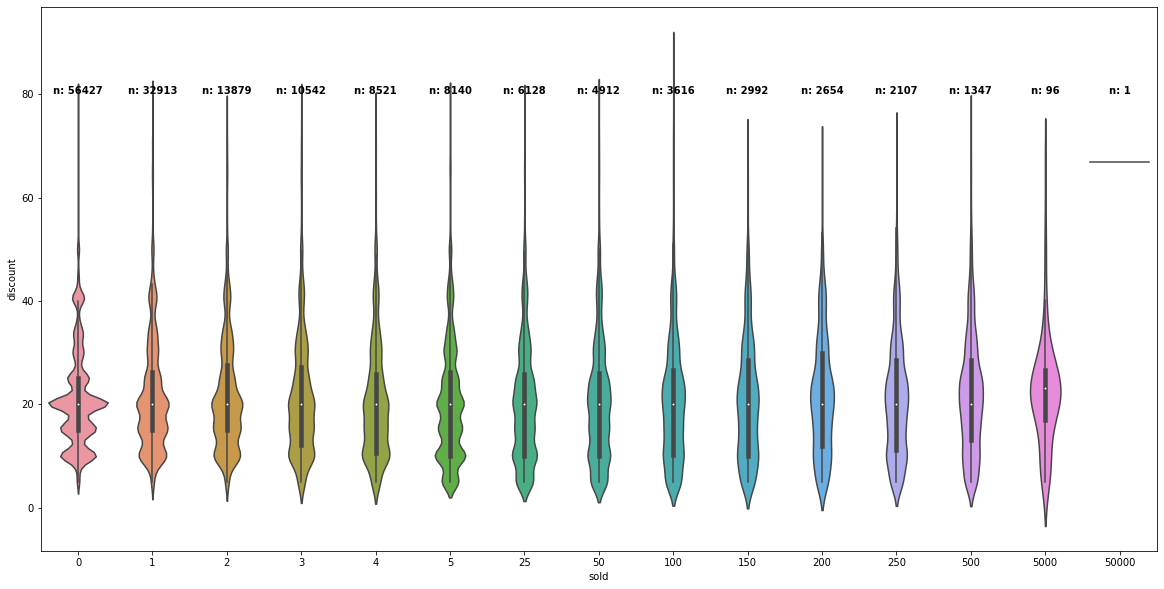

In [32]:
fig , ax = plt.subplots(figsize=(20,10))

sns.violinplot(x="sold", y="discount",  data=df)
# Calculate number of obs per group & median to position labels
medians = df.groupby(['sold'])['discount'].median().values
nobs = df['sold'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], 80, nobs[tick], horizontalalignment='center', color='k', weight='semibold')

#### Encodeamos variables categorias para hacer un moddelo predictivo y encontrar la importancia de las variables para predecir discount:
- Las variables categoricas que implican orden se las puede reemplazar por label jerarquicas que implican el orden.
- Las demas variables categoricas se las convierte en dummys

In [33]:
df = df.reset_index(drop=True)
df_clean = df.copy()

df_clean["seller_status"] =df_clean["seller_status"].map({'platinum':3,"gold": 2, "silver": 1, 'without': 0, })
df_clean["listing_type"] =df_clean["listing_type"].map({'gold_premium':2, 'gold_special': 1, "gold_pro": 0})
df_clean["seller_level_id"] =df_clean["seller_level_id"].map({'5_green':5, '4_light_green': 4, "3_yellow":3, '2_orange': 2, "1_red": 1, "0_blank": 0})
df_clean = pd.concat([df_clean.drop('address_state_name', axis=1), pd.get_dummies(df_clean['address_state_name'])], axis=1)
df_clean = pd.concat([df_clean.drop('shipping_mode', axis=1), pd.get_dummies(df_clean['shipping_mode'])], axis=1)
df_clean = pd.concat([df_clean.drop('category_main', axis=1), pd.get_dummies(df_clean['category_main'])], axis=1)
df_clean = pd.concat([df_clean.drop('logistic_type', axis=1), pd.get_dummies(df_clean['logistic_type'])], axis=1)


In [34]:
rf = RandomForestRegressor(bootstrap=True, n_estimators=200)


In [35]:
y = df_clean["discount"]
X = df_clean.drop(["discount"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [36]:
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)

In [37]:
cross_val_score(rf,X_train,y_train,cv=3)

array([0.8769798 , 0.87695429, 0.87742975])

### Con este simple modelo predictivo encontramos que la cantidad de ventas del vendedor y los días en que se registro son de importancia para predecir el descuento.

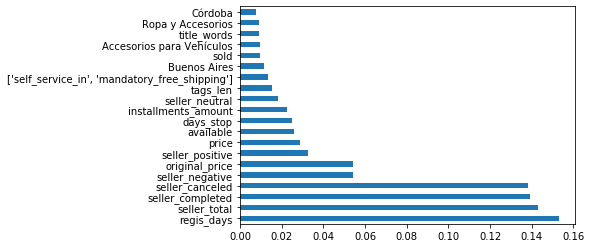

In [38]:
feat_importances = pd.Series(rf.feature_importances_, index=X[list(X.columns)].columns)
feat_importances.nlargest(20).plot(kind='barh')


#### Aprovechando que Discount se concentra en determinados valores vamos a convertirla en variable categorica y ver en esos grupos como se asocioan sus valores medios con respecto a la media general. Tomamos 6 rangos dde [0 , 10, 16, 21, 31, 40, 100 ].
#### Comprobamos en el gráfico que los datos se distribuyeron masomenos parejo

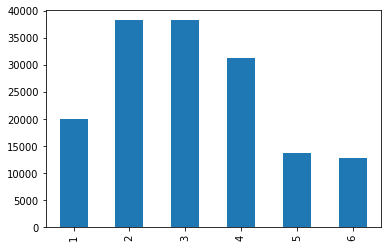

In [39]:
prov  = ["Buenos Aires","Capital Federal","Catamarca","Chaco","Chubut","Córdoba","Entre Ríos","Formosa","La Pampa","La Rioja","Mendoza","Misiones","Neuquén","Salta","San Juan","San Luis","Santa Cruz","Santa Fe","Tucumán","Santiago del Estero","Tierra del Fuego"]
df_exp = df_clean.drop(prov,axis=1).copy()
all_means = df_exp.mean()
labels = [1,2,3,4,5,6]
df_clean["discrete_discount"] = pd.cut(x=df_clean['discount'], bins=[0 , 10, 16, 21, 31, 40, 100 ], labels=labels, right=True)
df_clean["discrete_discount"].value_counts().sort_index().plot(kind="bar")

#### En cada bracket elegido resaltamos las variables que esten 2.5 veces por arriba o por abajo de la media general.

In [40]:
brackets_highlights =[]
for bracket in labels:
    normalize = (df_clean.query(f"discrete_discount == {bracket}").mean() /all_means)
    brackets_highlights.append(normalize[logical_or(normalize<0.4 ,normalize>2.5)].to_dict())

### Las publicaciones que tienen menos del 10% de descuento se caracterizan en relación a la medio total por:

In [41]:
brackets_highlights[0]

{'Alimentos y Bebidas': 3.0795021547779493,
 'Animales y Mascotas': 2.966549745449192,
 'Consolas y Videojuegos': 3.268788154221793,
 'Instrumentos Musicales': 0.39832982475467205,
 'Libros, Revistas y Comics': 3.5416562671591874,
 'Música, Películas y Series': 3.5204769273555776,
 'Otras categorías': 0.24437810241254904,
 'discount': 0.36537100385535765,
 'self_service': 0.0,
 'xd_drop_off': 2.773014339714277}

### Las publicaciones que tienen entre el 10% y 16% de descuento se caracterizan en relación a la medio total por:

In [42]:
brackets_highlights[1]

{'Antigüedades y Colecciones': 0.0,
 'Computación': 0.3658187972156697,
 'Cámaras y Accesorios': 0.24050421525731353,
 'Industrias y Oficinas': 0.28538921487431623,
 'Instrumentos Musicales': 2.833415977686186,
 'Otras categorías': 0.02299665524491116,
 'self_service': 0.0}

### Las publicaciones que tienen entre el 16% y 21% de descuento se caracterizan en relación a la medio total por:

In [43]:
brackets_highlights[2]

{'Animales y Mascotas': 0.23550091361073924,
 'Computación': 0.3401921335120234,
 'Instrumentos Musicales': 0.29317736888995394,
 'Música, Películas y Series': 0.3458499131311999,
 'Otras categorías': 3.855987334971739,
 'custom': 0.3182508176774824,
 'shipping_custom': 0.3182508176774824}

### Las publicaciones que tienen entre el 21% y 31% de descuento se caracterizan en relación a la medio total por:

In [44]:
brackets_highlights[3]

{'Accesorios para Vehículos': 0.2532059627015307,
 'Animales y Mascotas': 0.28845391568127293,
 'Antigüedades y Colecciones': 3.3217911579601886,
 'Instrumentos Musicales': 0.3104076742885422,
 'Joyas y Relojes': 0.38167308209549816,
 'Libros, Revistas y Comics': 0.3964313172731932,
 'Otras categorías': 0.014074548259034717,
 'Souvenirs, Cotillón y Fiestas': 0.37679718938460366}

### Las publicaciones que tienen entre el 31% y 40% de descuento se caracterizan en relación a la medio total por:

In [45]:
brackets_highlights[4]

{'Antigüedades y Colecciones': 0.3691844917386669,
 'Computación': 3.1362098685786415,
 'Joyas y Relojes': 0.27871601480270647,
 'Libros, Revistas y Comics': 0.10035763812860375,
 'Música, Películas y Series': 0.32171791422940976,
 'Otras categorías': 0.036648094379265556,
 'Souvenirs, Cotillón y Fiestas': 0.2994714627135463,
 'self_service': 0.0,
 'seller_canceled': 2.719758647490987,
 'seller_completed': 2.788134420816312,
 'seller_total': 2.784944122267775}

### Las publicaciones que tienen más del 40% de descuento se caracterizan en relación a la medio total por:


In [46]:
brackets_highlights[5]

{'Accesorios para Vehículos': 0.38544599687420733,
 'Agro': 0.3600942733312368,
 'Animales y Mascotas': 0.1398195253401648,
 'Antigüedades y Colecciones': 0.19635856837389268,
 'Belleza y Cuidado Personal': 0.38063700883596313,
 'Joyas y Relojes': 0.23718559744173176,
 'Libros, Revistas y Comics': 0.1281055900621118,
 'Otras categorías': 0.009746031465262373,
 'Salud y Equipamiento Médico': 0.3122399827292312,
 "['mandatory_free_shipping']": 0.38715366071448426,
 'self_service': 0.0}